# [실습-퀴즈] Python을 활용한 AI 모델링 - 머신러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습해 보겠습니다.
+ 머신러닝 모델에는 아래와 같이 모델들이 있습니다.
 + 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 + 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM
+ 솔직히, 머신러닝이 딥러닝보다 코딩하기 쉽습니다. 4줄 템플릿에 맞쳐 코딩하면 되기 때문입니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 머신러닝 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 - 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM 
2. 재현율 성능이 너무 안나온다. 어떻게 해결할수 있을까?


#  
# 1. 머신러닝 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### data_v1_save.csv 파일 읽어오기

In [5]:
# 앞쪽 전처리에서 저장한 cust_data.csv 파일 읽기
df = pd.read_csv('data_v1_save.csv')

## ③ 데이터 분석

In [6]:
# 17컬럼, 7,027 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [7]:
df.tail()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,Female,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7023,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7024,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7025,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7026,Male,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


<AxesSubplot:>

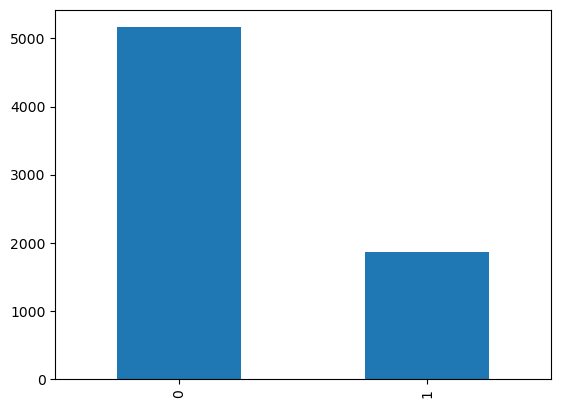

In [8]:
# Churn 레이블 불균형 
df['Churn'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 한다. 즉, Ojbect 타입을 모든 숫자형 변경 필요
+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [9]:
# MultipleLines 컬럼 내용 보기
df[['MultipleLines']].head()

,MultipleLines
0,No
1,No
2,No phone service
3,No
4,Yes


In [10]:
# MultipleLines 컬럼에 대한 분포 확인 : 3가지 되어 있음 확인
df['MultipleLines'].value_counts()

No                  3380
Yes                 2966
No phone service     681
Name: MultipleLines, dtype: int64

In [11]:
# MultipleLines 컬럼의 값들이 문자열로 되어 있어 숫자로 변환해야 함. 컴퓨터가 이해할수 있도록
# Object 컬럼의 데이터를 원-핫-인코딩해서 숫자로 변경해 주는 함수 : Pandas get_dummies()

pd.get_dummies(data=df, columns=['MultipleLines'])

,gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Male,No,No,34,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,0,0
1,Male,No,No,2,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,0,0
2,Male,No,No,45,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1,0
3,Female,No,No,2,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,0,0
4,Female,No,No,8,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Female,No,No,72,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,1,0,0
7023,Male,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0,0,1
7024,Female,Yes,Yes,72,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0,0,1
7025,Female,Yes,Yes,11,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,1,0


In [12]:
# Object 컬럼 확인
df.select_dtypes('object').head(3)

,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,No,No,No,DSL,Yes,No,No,No,No,One year,No,Mailed check
1,Male,No,No,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check
2,Male,No,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic)


In [13]:
# Object 컬럼명 수집

cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], dtype=object)

##### <font color=blue> **[문제] Object 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [14]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장
col_g = ['gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

df1 = pd.get_dummies(data=df, columns=col_g)


In [15]:
# 모든 컬럼 데이터가 숫자되어 있음을 확인
# 40컬럼, 7,027 라인

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7027 non-null   int64  
 1   MonthlyCharges                           7027 non-null   float64
 2   TotalCharges                             7027 non-null   float64
 3   Churn                                    7027 non-null   int64  
 4   gender_Female                            7027 non-null   uint8  
 5   gender_Male                              7027 non-null   uint8  
 6   Partner_No                               7027 non-null   uint8  
 7   Partner_Yes                              7027 non-null   uint8  
 8   Dependents_No                            7027 non-null   uint8  
 9   Dependents_Yes                           7027 non-null   uint8  
 10  MultipleLines_No                         7027 no

In [16]:
df1.head(3)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


## ⑤ Train, Test  데이터셋 분할

#### 입력(X)과 레이블(y) 나누기

##### <font color=blue> **[문제] df1 DataFrame에서 'Churn' 컬럼을 제외한 나머지 정보를 X에 저장하세요.** </font>

In [19]:
# DataFrame drop 함수 활용
# 'Churn' 컬럼 삭제
# DataFrame에서 values만 X에 저장

target = 'Churn'
x = df1.drop(target, axis=1)
x = x.values

##### <font color=blue> **[문제] df DataFrame에서 'Churn' 컬럼을 y로 저장하세요.** </font>

In [22]:
# DataFrame 'Churn' 컬럼 사용
# DataFrame에서 values만 y에 저장

y = df1.loc[:, target]
y = y.values


In [24]:
x.shape, y.shape

((7027, 39), (7027,))

#### Train , Test dataset 나누기

In [25]:
from sklearn.model_selection import train_test_split

##### <font color=blue> **[문제] Train dataset, Test dataset 나누세요.** </font>

In [30]:
# Train dataset, Test dataset 나누기 : train_test_split 함수 사용
# 입력 : X, y 
# Train : Test 비율 = 7: 3  --> test_size=0.3
# y Class 비율에 맞게 나누기 : stratify=y
# 여러번 수행해도 같은 결과 나오게 고정하기 : random_state=42 
# 결과 : X_train, X_test, y_train, y_test


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                  stratify=y, random_state=42)



In [31]:
x_train.shape

(4918, 39)

In [32]:
y_train.shape

(4918,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [33]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7022,72,21.15,1419.40,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
7023,24,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7024,72,103.20,7362.90,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7025,11,29.60,346.45,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7026,4,74.40,306.60,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [34]:
from sklearn.preprocessing import MinMaxScaler

##### <font color=blue> **[문제] MinMaxScaler 함수를 'scaler'로 정의 하세요.** </font>

In [35]:
# 사이키런의 MinMaxScaler() 함수 활용
# 정의할 결과를 'scaler'로 매핑

scaler = MinMaxScaler()



In [36]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
x_train[:2], y_train[:2]

(array([[0.65277778, 0.56851021, 0.40877722, 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 1.        , 1.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 1.        , 0.        , 0.        ],
        [0.27777778, 0.00498256, 0.04008671, 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 

## ⑦ 모델 개발

#### (참고) 모델별 바차트 그려주고 성능 확인을 위한 함수

In [39]:
# 모델별로 Recall 점수 저장
# 모델 Recall 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능

from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions 함수 호출하여 Scatter 그래프 그리며
# 모델별 MSE값을 Bar chart로 그려줌
def recall_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(12, 9))

    #acc = accuracy_score(actual, pred)
    acc = recall_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'recall'])
    print(df)
   
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['recall'])
    
    for i, v in enumerate(df['recall']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('recall', fontsize=18)
    plt.xlim(0, 100)
    
    plt.show()

###  
### 1) 로지스틱 회귀 (LogisticRegression, 분류)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

##### <font color=blue> **[문제] LogisticRegression 모델 정의하고 학습시키세요.** </font>

In [41]:
# LogisticRegression 함수 사용 및 정의 : lg 저장
# 정의된 LogisticRegression 학습 fit() : 입력값으로 X_train, y_train 준다.

model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)



LogisticRegression()

In [42]:
# 분류기 성능 평가(score)
model_lg.score(x_test, y_test)

0.8060692271218587

- 분류기 성능 평가 지표

In [43]:
model_lg_pred = model_lg.predict(x_test)

In [44]:
# 오차행렬
# TN  FP
# FN  TP

confusion_matrix(y_test, model_lg_pred) 

array([[1386,  163],
       [ 246,  314]], dtype=int64)

In [45]:
# 정확도
accuracy_score(y_test, model_lg_pred)  

0.8060692271218587

In [46]:
# 정밀도
precision_score(y_test, model_lg_pred) 

0.6582809224318659

In [47]:
# 재현율 : 낮다. 
recall_score(y_test, model_lg_pred)  

0.5607142857142857

In [48]:
# 정밀도 + 재현율
f1_score(y_test, model_lg_pred) 

0.6055930568948892

In [49]:
print(classification_report(y_test, model_lg_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.56      0.61       560

    accuracy                           0.81      2109
   macro avg       0.75      0.73      0.74      2109
weighted avg       0.80      0.81      0.80      2109



                model     recall
0  LogisticRegression  56.071429


<Figure size 1200x900 with 0 Axes>

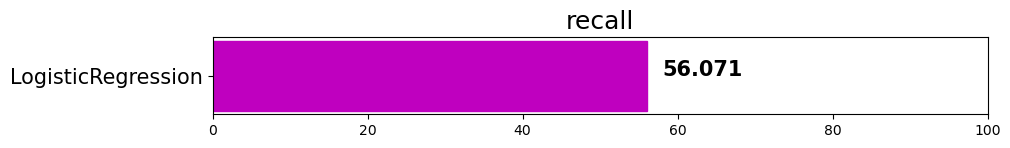

In [50]:
recall_eval('LogisticRegression', model_lg_pred, y_test)

###   
### 2) KNN (K-Nearest Neighbor)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
knn_pred = knn.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                model     recall
0  LogisticRegression  56.071429
1  K-Nearest Neighbor  52.142857


<Figure size 1200x900 with 0 Axes>

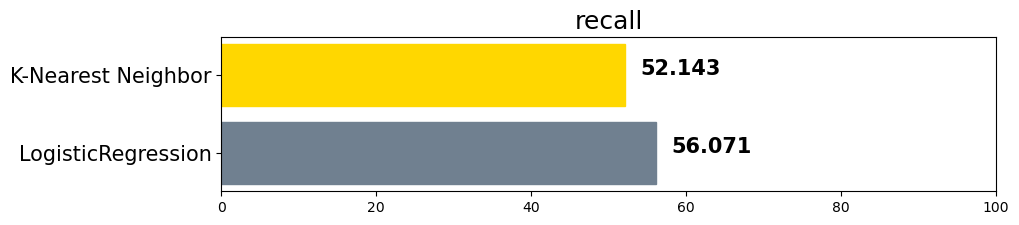

In [54]:
recall_eval('K-Nearest Neighbor', knn_pred, y_test)

###  
### 3) 결정트리(DecisionTree)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

##### <font color=blue> **[문제] 학습된 DecisionTreeClassifier 모델로 예측해 보기** </font>

In [57]:
# DecisionTreeClassifier 학습 모델 : dt
# DecisionTreeClassifier 모델의 predict() 활용 : 입력값으로 X_test
# 결과 : dt_pred 저장

dt_pred = dt.predict(x_test)



                model     recall
0  LogisticRegression  56.071429
1        DecisionTree  55.714286
2  K-Nearest Neighbor  52.142857


<Figure size 1200x900 with 0 Axes>

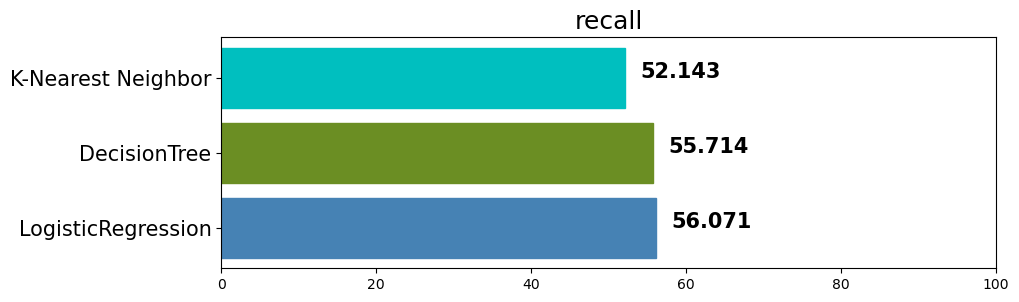

In [58]:
recall_eval('DecisionTree', dt_pred, y_test)

###  
### **앙상블 기법의 종류**
- 배깅 (Bagging): 여러개의 DecisionTree 활용하고 샘플 중복 생성을 통해 결과 도출. RandomForest
- 부스팅 (Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식. XGBoost, LGBM

![앙상블](https://teddylee777.github.io/images/2019-12-18/image-20191217144823555.png)

###  
### 4) 랜덤포레스트(RandomForest)
+ Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
+ 여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- n_estimators: 앙상블하는 트리의 갯수
- max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용
- min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [61]:
rfc_pred = rfc.predict(x_test)

                   model     recall
0     LogisticRegression  56.071429
1           DecisionTree  55.714286
2     K-Nearest Neighbor  52.142857
3  RandomForest Ensemble  52.142857


<Figure size 1200x900 with 0 Axes>

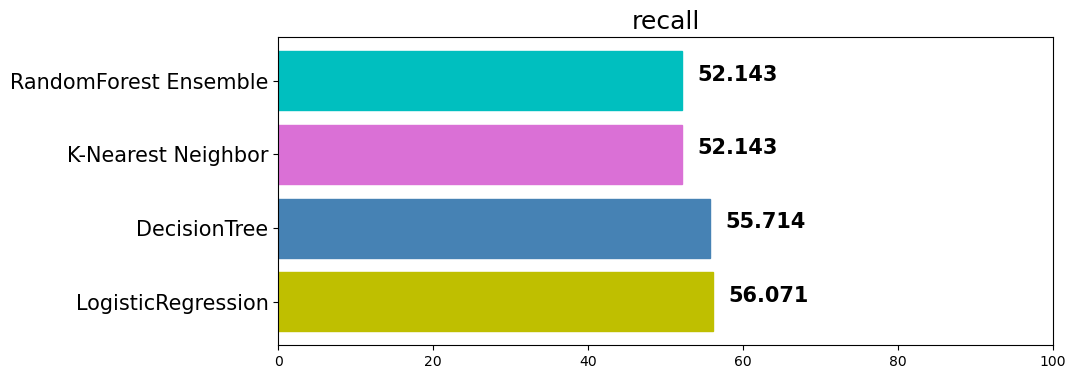

In [62]:
recall_eval('RandomForest Ensemble', rfc_pred, y_test)

###  
### 5) XGBoost
+ 여러개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
+ Kaggle 대회에서 자주 사용하는 모델이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 여전히 학습시간이 매우 느리다

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0
- max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

In [ ]:
!pip install xgboost

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb = XGBClassifier(n_estimators=3, random_state=42)  
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [65]:
xgb_pred = xgb.predict(x_test)

                   model     recall
0     LogisticRegression  56.071429
1           DecisionTree  55.714286
2     K-Nearest Neighbor  52.142857
3  RandomForest Ensemble  52.142857
4                XGBoost  52.142857


<Figure size 1200x900 with 0 Axes>

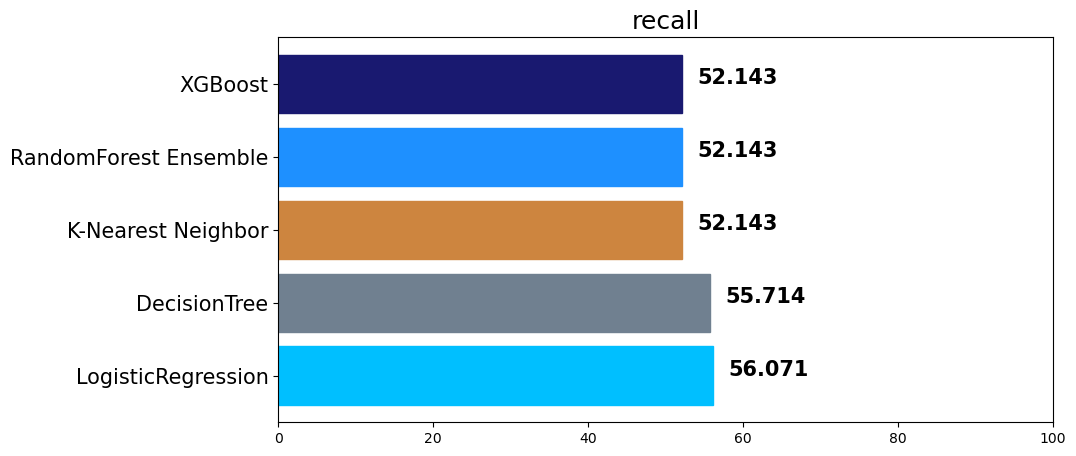

In [66]:
recall_eval('XGBoost', xgb_pred, y_test)

###  
### 6) Light GBM
+ XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
+ XGBoost에 비해 학습시간이 짧은 편이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- 속도도 매우 빠릅니다.

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3. 
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
!pip install lightgbm

In [67]:
from lightgbm import LGBMClassifier

In [71]:
lgbm = LGBMClassifier(n_estimators=3, random_state=42)  
lgbm.fit(x_train, y_train)

LGBMClassifier(n_estimators=3, random_state=42)

In [72]:
lgbm_pred = lgbm.predict(x_test)

                   model     recall
0     LogisticRegression  56.071429
1           DecisionTree  55.714286
2     K-Nearest Neighbor  52.142857
3  RandomForest Ensemble  52.142857
4                XGBoost  52.142857
5                   LGBM   0.000000


<Figure size 1200x900 with 0 Axes>

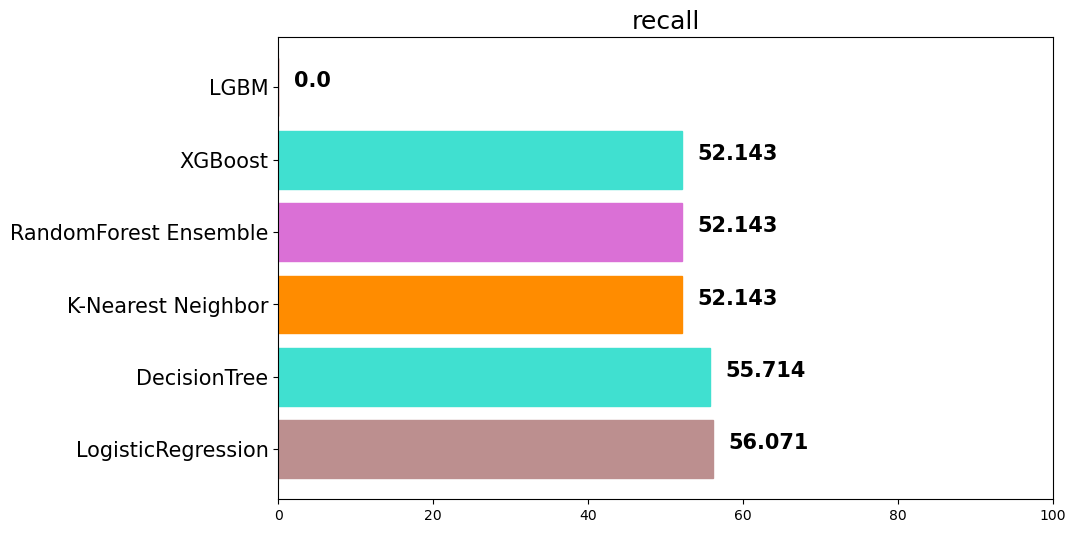

In [73]:
recall_eval('LGBM', lgbm_pred, y_test)

In [75]:
# 정확도는 73% 정도 나온다.
lgbm.score(x_test, y_test)

0.7344713134186819

In [76]:
# 재현율 0으로 나온다. 
recall_score(y_test, lgbm_pred)  

0.0

##  
# <font color=red>2. 재현율 성능이 너무 안나온다. 어떻게 해결할수 있을까?</font>

##  
## 배운 내용 정리
1. 머신러닝 모델 프로세스 <br>
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 평가 지표 활용 : 모델별 성능 확인을 위한 함수 (가져다 쓰면 된다)
3. 단일 회귀예측 모델 : LogisticRegression, KNN, DecisionTree
4. 앙상블 (Ensemble) : RandomForest, XGBoost, LGBM
5. 재현율 성능이 너무 안나온다. 어떻게 해결할수 있을까?

<p>
<p>
<p>

<p>
<p>
<p>

<p>
<p>
<p>

# [실습-퀴즈] Python을 활용한 AI 모델링 - 딥러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN에 대해 코딩하여 모델 구축해 보겠습니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?

#  
# 1. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

### <font color='red'>1 ~ 6번까지 완료한 상태</font>

## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

####  
### 라이브러리 임포트

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

####  
### 하이퍼파라미터 설정 : batch_size, epochs

In [78]:
batch_size = 16
epochs = 20

####  
### 모델 입력(features) 갯수 확인

In [79]:
x_train.shape

(4918, 39)

####  
### 모델 출력(label) 갯수 확인

In [80]:
y_train.shape

(4918,)

####  
### A. 이진분류 DNN모델 구성 

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

##### <font color=blue> **[문제] 요구사항대로 Sequential 모델을 만들어 보세요.** </font>

In [83]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류
n = x_train.shape[1]

model = Sequential([Dense(4, input_shape=(39,), activation='relu')
                   ,Dense(3, activation='relu')
                   ,Dense(1, activation='sigmoid')])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 160       
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 확인

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 160       
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [84]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(39,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model1 = Sequential([Dense(4, input_shape=(39,), activation='relu')
                   ,Dropout(0.3)
                   ,Dense(3, activation='relu')
                   ,Dropout(0.3)
                   ,Dense(1, activation='sigmoid')])

model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 160       
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
 dropout_3 (Dropout)         (None, 3)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 과적합 방지 모델 확인

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 160       
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 이진 분류 모델

In [89]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

####  
### 모델 학습

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 10번
+ batch_size : 10번

In [91]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 10번
### batch_size 10번

model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))




Epoch 1/10
492/492 [==============================] - 2s 2ms/step - loss: 0.5406 - accuracy: 0.7344 - val_loss: 0.4723 - val_accuracy: 0.7345
Epoch 2/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5054 - accuracy: 0.7344 - val_loss: 0.4535 - val_accuracy: 0.7345
Epoch 3/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4902 - accuracy: 0.7344 - val_loss: 0.4484 - val_accuracy: 0.7345
Epoch 4/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4898 - accuracy: 0.7344 - val_loss: 0.4454 - val_accuracy: 0.7345
Epoch 5/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4850 - accuracy: 0.7344 - val_loss: 0.4440 - val_accuracy: 0.7345
Epoch 6/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.7344 - val_loss: 0.4419 - val_accuracy: 0.7345
Epoch 7/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7344 - val_loss: 0.4389 - val_accuracy: 0.7345
Epoch 

####  
### B. 다중 분류 DNN 구성
+ 13개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [97]:
model_b = Sequential([Dense(5, input_shape=(13,), activation='relu')
                     ,Dropout(0.3)
                     ,Dense(4, activation='relu')
                     ,Dropout(0.3)
                     ,Dense(2, activation='softmax')])

model_b.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 5)                 70        
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_20 (Dense)            (None, 4)                 24        
                                                                 
 dropout_9 (Dropout)         (None, 4)                 0         
                                                                 
 dense_21 (Dense)            (None, 2)                 10        
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [93]:
# 39개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(39,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

####  
### 모델 확인

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 200       
                                                                 
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 dense_17 (Dense)            (None, 4)                 24        
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


####  
### 모델 컴파일 – 다중 분류 모델

In [95]:
y_train.shape

(4918,)

In [96]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

####  
### 모델 학습

In [99]:
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
308/308 [==============================] - 1s 2ms/step - loss: 0.5892 - accuracy: 0.7344 - val_loss: 0.5148 - val_accuracy: 0.7345
Epoch 2/20
308/308 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7344 - val_loss: 0.4775 - val_accuracy: 0.7345
Epoch 3/20
308/308 [==============================] - 1s 2ms/step - loss: 0.5023 - accuracy: 0.7344 - val_loss: 0.4596 - val_accuracy: 0.7345
Epoch 4/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4975 - accuracy: 0.7344 - val_loss: 0.4555 - val_accuracy: 0.7345
Epoch 5/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.7344 - val_loss: 0.4501 - val_accuracy: 0.7345
Epoch 6/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.7344 - val_loss: 0.4528 - val_accuracy: 0.7345
Epoch 7/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4724 - accuracy: 0.7344 - val_loss: 0.4434 - val_accuracy: 0.7345
Epoch 

####  
### Callback : 조기종료, 모델 저장

In [100]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [101]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=5)

In [102]:
# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = ModelCheckpoint('best_model.h5', verbose=1, 
                              monitor='val_loss', mode='min', save_best_only=True)

####  
### 모델 학습

In [104]:
history = model.fit(x=x_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
244/246 [============================>.] - ETA: 0s - loss: 0.4798 - accuracy: 0.7344
Epoch 1: val_loss improved from inf to 0.44851, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.7344 - val_loss: 0.4485 - val_accuracy: 0.7345
Epoch 2/50
235/246 [===========================>..] - ETA: 0s - loss: 0.4744 - accuracy: 0.7334
Epoch 2: val_loss improved from 0.44851 to 0.44103, saving model to best_model.h5
246/246 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.7344 - val_loss: 0.4410 - val_accuracy: 0.7345
Epoch 3/50
237/246 [===========================>..] - ETA: 0s - loss: 0.4755 - accuracy: 0.7338
Epoch 3: val_loss improved from 0.44103 to 0.44093, saving model to best_model.h5
246/246 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.7344 - val_loss: 0.4409 - val_accuracy: 0.7345
Epoch 4/50
222/246 [==========================>...] - ETA: 0s - loss: 0.4830 

####  
## ⑧ 모델 성능 평가

### 성능 시각화

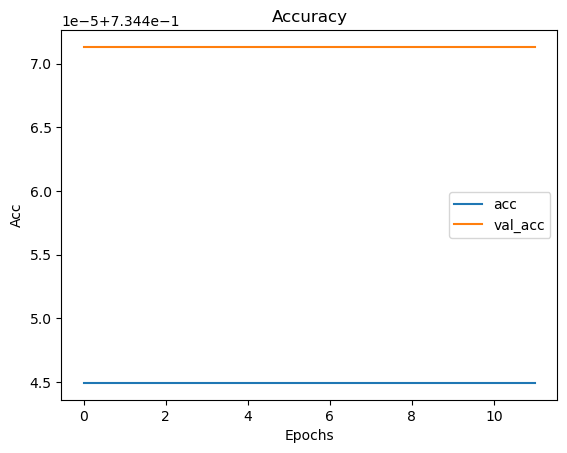

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

### 성능 평가

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [107]:
pred = model.predict(x_test)

66/66 [==============================] - 0s 1ms/step


In [108]:
pred.shape

(2109, 2)

In [109]:
y_pred = np.argmax(pred, axis=1)

In [110]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
# 정확도 80%
accuracy_score(y_test, y_pred)

0.7344713134186819

In [112]:
# 재현율 성능이 좋지 않다
recall_score(y_test, y_pred)

0.0

In [113]:
# accuracy, recall, precision 성능 한번에 보기

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       560

    accuracy                           0.73      2109
   macro avg       0.37      0.50      0.42      2109
weighted avg       0.54      0.73      0.62      2109



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  
# 2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?
+ 성능향상 할수 있는 방법은 여러가지 있습니다.
+ DNN 하이퍼 파라미터 수정하면서 성능향상이 되는지 확인
+ 데이터 줄이거나 늘리거나, Feature(컬럼)을 늘리거나 줄이거나 하는 식의 Feature Engineering 방법

####  
## Feature Engineering 통한 성능향상
+ 불균현 Churn 데이터 균형 맞추기 : OverSampling, UnderSampling
+ OverSampling 기법 : SMOTE(Synthetic Minority Over-sampling Technique) 
+ 참조사이트 : https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

![SMOTE](https://github.com/gzone2000/TEMP_TEST/raw/master/SMOTE.png)

### imbalanced-learn 패키지 설치
+ imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지

In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 5.3 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


####  
### SMOTE 함수 이용하여 Oversampling

In [114]:
from imblearn.over_sampling import SMOTE

In [116]:
# SMOTE 함수 정의 및 Oversampling 수행

smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

In [117]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4918, 39) (4918,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7224, 39) (7224,)


In [118]:
# SMOTE 적용 후 레이블 값 분포 : 0과 1 갯수가 동일 
pd.Series(y_train_over).value_counts()

0    3612
1    3612
dtype: int64

####  
### 데이터 정규화

In [119]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_over = scaler.transform(x_train_over)
x_test = scaler.transform(x_test)

In [ ]:
X_train_over.shape, y_train_over.shape, X_test.shape, y_test.shape

((7224, 39), (7224,), (2109, 39), (2109,))

####  
### 모델 개발(Creating the Model)

In [120]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(39,)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [121]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [122]:
# 여기서는 val_accuracy 모니터링해서 성능이 좋아지지 않으면 조기 종료 하게 함.
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', 
                           verbose=1, patience=5)

In [123]:
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', mode='min', 
                              save_best_only=True)

In [124]:
history = model.fit(x=x_train_over, y=y_train_over, 
          epochs=50 , batch_size=32,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
226/226 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.7111
Epoch 1: val_loss improved from inf to 0.48903, saving model to best_model.h5
226/226 [==============================] - 1s 3ms/step - loss: 0.5693 - accuracy: 0.7111 - val_loss: 0.4890 - val_accuracy: 0.7416
Epoch 2/50
210/226 [==========================>...] - ETA: 0s - loss: 0.5164 - accuracy: 0.7551
Epoch 2: val_loss did not improve from 0.48903
226/226 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.7533 - val_loss: 0.5033 - val_accuracy: 0.7345
Epoch 3/50
221/226 [============================>.] - ETA: 0s - loss: 0.4995 - accuracy: 0.7660
Epoch 3: val_loss did not improve from 0.48903
226/226 [==============================] - 1s 2ms/step - loss: 0.5012 - accuracy: 0.7656 - val_loss: 0.4973 - val_accuracy: 0.7397
Epoch 4/50
226/226 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.7708
Epoch 4: val_loss improved from 0.48903 to 0.48287,

####  
### 모델 성능 평가

#### 성능 시각화

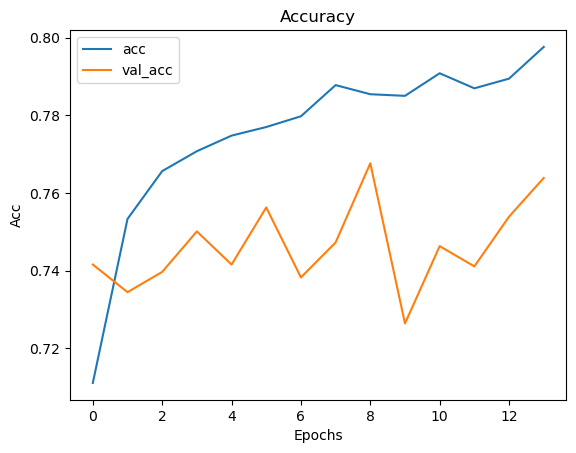

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### 성능 평가

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [127]:
pred = model.predict(x_test)

66/66 [==============================] - 0s 1ms/step


In [128]:
pred.shape

(2109, 2)

In [129]:
y_pred = np.argmax(pred, axis=1)

In [130]:
# 정확도 70~80%
accuracy_score(y_test, y_pred)

0.7638691322901849

In [131]:
# 재현율 70% 정도로 이전보다 좋아졌다.
recall_score(y_test, y_pred)

0.7178571428571429

In [132]:
# recall 성능을 올렸지만, 반대급부로 precision 성능은 떨어진다.
# accuracy, recall, precision 어떤것에 집중할지 선택하는것도 필요하다.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1549
           1       0.54      0.72      0.62       560

    accuracy                           0.76      2109
   macro avg       0.71      0.75      0.72      2109
weighted avg       0.79      0.76      0.77      2109



###  
## 배운 내용 정리
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 + 데이터 가져오기
 + 데이터 전처리
 + Train, Test 데이터셋 분할
 + 데이터 정규화
 + DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 방법은?
 + Feature Engineering : 성능 잘 나올수 있도록 데이터 가공
 + 불균현 데이터 문제 해소 : under-sampling, over-sampling
 + Over-Sampling 기법 : SMOTE